In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('ratings_demo.csv')


In [2]:
data.head()

,user,item,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
data.rating.value_counts()


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

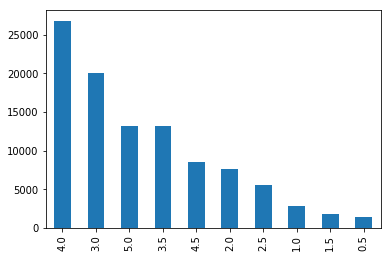

In [19]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
user         100836 non-null int64
item         100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [21]:
data.isnull().sum()

user         0
item         0
rating       0
timestamp    0
dtype: int64

In [22]:
data = data[['user', 'item', 'rating', 'timestamp']]
data = data.iloc[:, :-1]

In [23]:
data.head()

,user,item,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [25]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(data[['user', 'item', 'rating']], reader)

In [26]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [27]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [30]:
predictions = algo.test(testset)

In [31]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.8799


0.8799322601601051